In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from tqdm import tqdm_notebook

### 1. Load Data and Merge Data

In [2]:
df1 = pd.read_csv("data_set_1.csv")
df2 = pd.read_csv("data_set_2.csv")
df3 = pd.read_csv("data_set_3.csv")
df4 = pd.read_csv("data_set_4.csv")
df5 = pd.read_csv("data_set_5.csv")
df6 = pd.read_csv("data_set_6.csv")
df7 = pd.read_csv("data_set_7.csv")
df8 = pd.read_csv("data_set_8.csv")
df9 = pd.read_csv("data_set_9.csv")
df10 = pd.read_csv("data_set_10.csv")
df11 = pd.read_csv("data_set_11.csv")

risk1 = pd.read_csv("risk_factors_1.csv")
risk2 = pd.read_csv("risk_factors_2.csv")

security1 = pd.read_csv("security_reference_data_w_ret1d_1.csv")
security2 = pd.read_csv("security_reference_data_w_ret1d_2.csv")

In [3]:
df_all = pd.merge(df1, df2, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df3, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df4, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df5, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df6, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df7, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df8, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df9, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df10, how='outer', on=['data_date','security_id'])
df_all = pd.merge(df_all, df11, how='outer', on=['data_date','security_id'])
df_all = df_all.drop_duplicates()
df_all = df_all.reset_index()

In [4]:
df_all = df_all.drop(columns=["index"])
df_all.head(10)

,data_date,security_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11
0,20100104,647001,3.4530,3.9360,0.079633,5.9847,0.037713,-0.0660,-0.174,8172.0,2.19,NaN,NaN
1,20100104,696801,1.5820,2.2950,NaN,-2.4456,NaN,NaN,NaN,60.0,NaN,NaN,NaN
2,20100104,702901,NaN,NaN,NaN,-4.9255,NaN,NaN,NaN,2100.0,0.00,NaN,NaN
3,20100104,1178501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20100104,1323901,-0.9449,0.7976,NaN,-2.0536,NaN,NaN,NaN,8706.0,100.00,NaN,NaN
5,20100104,1384501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31612.0,9.61,NaN,NaN
6,20100104,1536201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10050.0,100.00,NaN,NaN
7,20100104,1604101,-9.4220,-10.3810,NaN,-1.3229,NaN,NaN,NaN,909.0,0.00,NaN,NaN
8,20100104,1610801,-3.7690,2.0970,NaN,-3.7759,NaN,NaN,NaN,200.0,NaN,NaN,NaN
9,20100104,2486001,-4.0556,-15.6589,-0.350052,-14.8978,-0.084879,-0.4623,-1.032,5303850.0,100.00,NaN,NaN


In [5]:
risk_security1 = pd.merge( security1, risk1, how='left', on=['data_date','security_id'])
risk_security2 = pd.merge( security2, risk2, how='left', on=['data_date','security_id'])

risk_security_all = pd.concat([risk_security1,risk_security2],join = "outer")
risk_security_all = risk_security_all.reset_index()

In [6]:
risk_security_all_Y = risk_security_all[risk_security_all["in_trading_universe"]=="Y"]
risk_security_all_Y = risk_security_all_Y.reset_index()
risk_security_all_Y = risk_security_all_Y.drop(columns=["level_0","index"])

In [7]:
risk_security_all_Y.head()

,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,rf1,rf2,rf3,rf4,rf5,rf6
0,20100104,78001,23.77,460537.0,20101010,Y,0.034378,0.538,-0.247,-0.098,0.848,0.640,0.310
1,20100104,78401,19.64,1847102.0,20104020,Y,0.028272,0.776,-0.371,-0.501,-0.385,-0.099,0.070
2,20100104,85301,6.58,2142663.0,45201020,Y,0.059581,1.151,-1.731,0.575,0.252,-1.041,-1.678
3,20100104,97801,47.57,2361982.0,40301020,Y,0.028541,2.081,0.267,-0.449,-0.216,0.041,0.792
4,20100104,100701,37.00,192260.0,55102010,Y,0.014532,-0.937,0.052,-1.301,0.401,-0.842,0.402


In [8]:
# security_all = pd.concat([security1,security2],join = "outer")
# security_all_Y = security_all[security_all["in_trading_universe"]=="Y"]
# security_all_Y = security_all_Y.reset_index()
# security_all_Y = security_all_Y.drop(columns=["index"])
# df_security_Y = pd.merge(security_all_Y, df_all, how='left', on=['data_date','security_id'])

In [9]:
all = pd.merge(risk_security_all_Y, df_all, how='left', on=['data_date','security_id'])
all['data_date'] = pd.to_datetime(all['data_date'], format='%Y%m%d')

### 2.Data Checking and Analyzing ---- Risk Factor

#### Missing Value

In [10]:
risk_all = all.drop(columns = ["d1","d2","d3","d4","d5","d6","d7","d8","d9","d10","d11"])

print("NULL value amount",risk_all.isnull().sum())
print("NULL value ratio",risk_all.isnull().sum()/len(all))

NULL value amount data_date                0
security_id              0
close_price              0
volume                   0
group_id                 0
in_trading_universe      0
ret1d                  992
rf1                      0
rf2                      0
rf3                      0
rf4                      0
rf5                      0
rf6                      0
dtype: int64
NULL value ratio data_date              0.000000
security_id            0.000000
close_price            0.000000
volume                 0.000000
group_id               0.000000
in_trading_universe    0.000000
ret1d                  0.000141
rf1                    0.000000
rf2                    0.000000
rf3                    0.000000
rf4                    0.000000
rf5                    0.000000
rf6                    0.000000
dtype: float64


In [11]:
risk_all_set1 = risk_all.set_index(['security_id','data_date'])
risk_all_set1 = risk_all_set1.sort_index()
risk_all_set1 = risk_all_set1.drop_duplicates()
print("The column ret1d is the precentage change of close price")


The column ret1d is the precentage change of close price


In [12]:
risk_all = risk_all.drop(columns=["ret1d"])
risk_all = risk_all.drop_duplicates()
risk_all.head(6)

,data_date,security_id,close_price,volume,group_id,in_trading_universe,rf1,rf2,rf3,rf4,rf5,rf6
0,2010-01-04,78001,23.77,460537.0,20101010,Y,0.538,-0.247,-0.098,0.848,0.640,0.310
2,2010-01-04,78401,19.64,1847102.0,20104020,Y,0.776,-0.371,-0.501,-0.385,-0.099,0.070
3,2010-01-04,85301,6.58,2142663.0,45201020,Y,1.151,-1.731,0.575,0.252,-1.041,-1.678
5,2010-01-04,97801,47.57,2361982.0,40301020,Y,2.081,0.267,-0.449,-0.216,0.041,0.792
7,2010-01-04,100701,37.00,192260.0,55102010,Y,-0.937,0.052,-1.301,0.401,-0.842,0.402
9,2010-01-04,102501,13.67,4597591.0,55105010,Y,1.345,-0.098,-0.350,0.224,0.441,0.419


#### Calculate Return

In [13]:
risk_all["return"] = risk_all.groupby("security_id")["close_price"].pct_change()
# risk_all = risk_all.drop_duplicates()

In [14]:
risk_all = risk_all.dropna()
risk_all = risk_all.reset_index()
risk_all = risk_all.drop(columns=["index"])

In [15]:
risk_all.head()

,data_date,security_id,close_price,volume,group_id,in_trading_universe,rf1,rf2,rf3,rf4,rf5,rf6,return
0,2010-01-05,78001,24.23,496257.0,20101010,Y,0.532,-0.207,-0.187,0.808,0.640,0.303,0.019352
1,2010-01-05,78401,19.77,2881636.0,20104020,Y,0.768,-0.441,-0.504,-0.387,-0.050,0.070,0.006619
2,2010-01-05,85301,6.66,3458084.0,45201020,Y,1.143,-1.492,0.441,0.235,-1.038,-1.666,0.012158
3,2010-01-05,97801,48.95,3965232.0,40301020,Y,2.076,0.276,-0.459,-0.242,0.064,0.779,0.029010
4,2010-01-05,100701,36.27,546563.0,55102010,Y,-0.951,0.060,-1.274,0.435,-0.836,0.413,-0.019730


#### Calculate Correlation Matrix

In [16]:
return_risk = risk_all.drop(columns=["close_price",'volume',"group_id","in_trading_universe"])
corr_risk = return_risk.drop(columns=["data_date","security_id"]).corr()
corr_risk

,rf1,rf2,rf3,rf4,rf5,rf6,return
rf1,1.000000,0.016381,0.050221,0.046852,0.080567,-0.158887,0.002963
rf2,0.016381,1.000000,-0.068392,-0.341874,0.055585,-0.101616,0.001665
rf3,0.050221,-0.068392,1.000000,-0.092153,0.207371,-0.348400,0.006623
rf4,0.046852,-0.341874,-0.092153,1.000000,-0.282271,0.312355,-0.019366
rf5,0.080567,0.055585,0.207371,-0.282271,1.000000,-0.057126,-0.001701
rf6,-0.158887,-0.101616,-0.348400,0.312355,-0.057126,1.000000,-0.010699
return,0.002963,0.001665,0.006623,-0.019366,-0.001701,-0.010699,1.000000


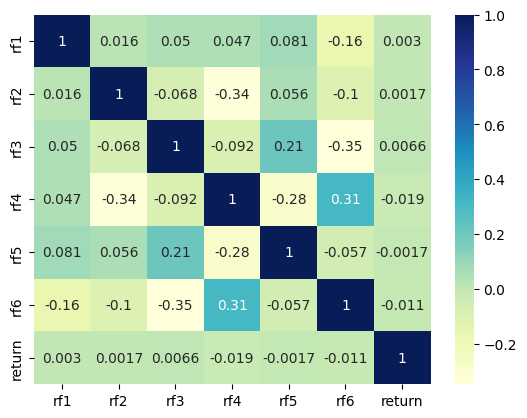

In [17]:
dataplot = sb.heatmap(corr_risk, cmap="YlGnBu", annot=True)
plt.show()

#### Deal with Abnormal Value

In [18]:
def winsor_data(data):
    q=data.quantile([0.02,0.98])
    data[data<q.iloc[0]]=q.iloc[0]
    data[data>q.iloc[1]]=q.iloc[1]
    return data

In [19]:
# rf1=risk_all_stock_full_data['rf1'].groupby('data_date').apply(winsor_data)

##### Normalization

In [20]:
def MaxMinNormal(data):
    """[0,1] normaliaztion"""
    x = (data - data.min()) / (data.max() - data.min())
    return x

def ZscoreNormal(data):
    """Z-score normaliaztion"""
    x=(data-data.mean())/data.std()
    return x

In [21]:
return_risk_norm = return_risk.groupby('data_date')[['rf1','rf2','rf3','rf4','rf5','rf6']].apply(lambda x: (x-np.mean(x,axis=0))/np.std(x,axis=0))
return_risk_norm = return_risk_norm.reset_index()
return_risk_norm = return_risk_norm.drop(columns=["level_1"])

In [22]:
return_risk_norm["rf_all"] = return_risk_norm["rf1"] + return_risk_norm["rf2"]\
                             + return_risk_norm["rf3"] + return_risk_norm["rf4"]\
                             + return_risk_norm["rf5"] + return_risk_norm["rf6"]
return_risk_norm["security_id"] = return_risk["security_id"]
return_risk_norm2 = return_risk_norm
return_risk_norm['month_date'] = return_risk_norm['data_date'].dt.strftime('%Y-%m')
return_risk_norm["return"] = risk_all["return"]


In [23]:
return_risk_norm 

,data_date,rf1,rf2,rf3,rf4,rf5,rf6,rf_all,security_id,month_date,return
0,2010-01-05,0.121835,-0.352514,-0.199821,0.803439,0.472226,0.579637,1.424801,78001,2010-01,0.019352
1,2010-01-05,0.347326,-0.601256,-0.554851,-0.607542,-0.215757,0.293786,-1.338295,78401,2010-01,0.006619
2,2010-01-05,0.705626,-1.718467,0.503519,0.126877,-1.200869,-1.835990,-3.419304,85301,2010-01,0.012158
3,2010-01-05,1.597078,0.160914,-0.504453,-0.436335,-0.102091,1.163608,1.878721,97801,2010-01,0.029010
4,2010-01-05,-1.295125,-0.068694,-1.417227,0.363024,-0.999460,0.714588,-2.702893,100701,2010-01,-0.019730
...,...,...,...,...,...,...,...,...,...,...,...
3999481,2017-12-29,-1.458468,-1.486288,0.533640,1.018381,0.463503,-0.186357,-1.115589,1117267401,2017-12,0.000694
3999482,2017-12-29,1.443107,2.575046,2.406108,-0.955157,2.607506,0.904266,8.980876,1117291901,2017-12,-0.018923
3999483,2017-12-29,0.085533,-1.127069,1.204750,-2.939777,-0.426133,2.880207,-0.322489,1117357001,2017-12,-0.032051
3999484,2017-12-29,-1.710861,-2.660130,1.901015,-0.680131,-1.209630,-1.193856,-5.553594,1117382401,2017-12,0.015304


### 2.Select Stock with Muiltple Factors

#### Select Stock with Risk Factor

In [24]:
return_risk_mean = return_risk_norm.groupby(["month_date","security_id"]).mean()

In [25]:
return_risk_mean = return_risk_mean.reset_index()
return_risk_mean = return_risk_mean.drop(columns=['rf1','rf2','rf3','rf4','rf5','rf6'])

In [26]:
return_risk_mean #[return_risk_mean["security_id"]==78001]

,month_date,security_id,data_date,rf_all,return
0,2010-01,78001,2010-01-17 02:40:00.000000000,1.905202,-0.001274
1,2010-01,78401,2010-01-17 02:40:00.000000000,-1.305012,-0.004539
2,2010-01,85301,2010-01-17 02:40:00.000000000,-3.045918,-0.011583
3,2010-01,97801,2010-01-17 02:40:00.000000000,1.650161,0.001130
4,2010-01,100701,2010-01-17 02:40:00.000000000,-2.617028,-0.002556
...,...,...,...,...,...
196525,2017-12,1117267401,2017-12-15 07:12:00.000000000,-0.722237,0.008891
196526,2017-12,1117291901,2017-12-16 01:15:47.368421120,8.984120,0.004843
196527,2017-12,1117357001,2017-12-15 07:12:00.000000000,-1.606014,-0.002481
196528,2017-12,1117382401,2017-12-26 09:36:00.000000000,-5.551833,0.002516


In [27]:
buy = return_risk_mean.groupby('month_date')['rf_all'].nlargest(20)
sell = return_risk_mean.groupby('month_date')['rf_all'].nsmallest(20)

In [28]:
return_risk_mean["level_1"] = return_risk_mean.index.to_list()
return_risk_mean2 = return_risk_mean.drop(columns=['month_date','rf_all'])

In [29]:
return_risk_mean2

,security_id,data_date,return,level_1
0,78001,2010-01-17 02:40:00.000000000,-0.001274,0
1,78401,2010-01-17 02:40:00.000000000,-0.004539,1
2,85301,2010-01-17 02:40:00.000000000,-0.011583,2
3,97801,2010-01-17 02:40:00.000000000,0.001130,3
4,100701,2010-01-17 02:40:00.000000000,-0.002556,4
...,...,...,...,...
196525,1117267401,2017-12-15 07:12:00.000000000,0.008891,196525
196526,1117291901,2017-12-16 01:15:47.368421120,0.004843,196526
196527,1117357001,2017-12-15 07:12:00.000000000,-0.002481,196527
196528,1117382401,2017-12-26 09:36:00.000000000,0.002516,196528


In [30]:
buy = buy.reset_index()
buy = pd.merge( buy, return_risk_mean2, how='left', on=['level_1'])
buy["position"] = [100] * len(buy)
sell = sell.reset_index()
sell = pd.merge( sell, return_risk_mean2, how='left', on=['level_1'])
sell["position"] = [-100] * len(sell)
portfolio = pd.concat([buy,sell])

In [31]:
portfolio = portfolio.sort_values(by="month_date" , ascending=True) 
portfolio2 = portfolio.drop(columns=["level_1","rf_all","data_date","position","return"])

In [32]:
n = len(portfolio2)
port = portfolio2["security_id"].tolist()


### 3.Monthly Allocate stocks

In [35]:
risk_all

,data_date,security_id,close_price,volume,group_id,in_trading_universe,rf1,rf2,rf3,rf4,rf5,rf6,return
0,2010-01-05,78001,24.23,496257.0,20101010,Y,0.532,-0.207,-0.187,0.808,0.640,0.303,0.019352
1,2010-01-05,78401,19.77,2881636.0,20104020,Y,0.768,-0.441,-0.504,-0.387,-0.050,0.070,0.006619
2,2010-01-05,85301,6.66,3458084.0,45201020,Y,1.143,-1.492,0.441,0.235,-1.038,-1.666,0.012158
3,2010-01-05,97801,48.95,3965232.0,40301020,Y,2.076,0.276,-0.459,-0.242,0.064,0.779,0.029010
4,2010-01-05,100701,36.27,546563.0,55102010,Y,-0.951,0.060,-1.274,0.435,-0.836,0.413,-0.019730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999481,2017-12-29,1117267401,28.84,685655.0,45101010,Y,-1.199,-1.605,0.692,1.286,0.429,-0.372,0.000694
3999482,2017-12-29,1117291901,33.70,428382.0,45301020,Y,1.836,2.533,2.553,-0.673,2.651,0.717,-0.018923
3999483,2017-12-29,1117357001,9.06,1074462.0,10102020,Y,0.416,-1.239,1.359,-2.643,-0.493,2.690,-0.032051
3999484,2017-12-29,1117382401,21.23,1428439.0,25401025,Y,-1.463,-2.801,2.051,-0.400,-1.305,-1.378,0.015304


In [47]:
risk_all_new = risk_all.copy(deep=True)
risk_all_new['data_date'] = risk_all_new['data_date'].apply(lambda x: str(x)[0:10])
risk_all_new['Month'] = risk_all_new['data_date'].apply(lambda x: str(x)[0:7])
start_of_month = list(risk_all_new.groupby('Month').min()['data_date'].values)

In [48]:
df_grp = risk_all.groupby('data_date')
prices = {}
for idx, df_date in tqdm_notebook(df_grp,total=len(df_grp)):
    if str(idx)[0:10] in start_of_month:
        prices[str(idx)[0:10]] = df_date[['security_id','close_price']].set_index('security_id').to_dict()['close_price']

/var/folders/sq/3pjxhr_d3lbcz22t0wt7hh4c0000gn/T/ipykernel_1615/1889212224.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, df_date in tqdm_notebook(df_grp,total=len(df_grp)):


  0%|          | 0/2013 [00:00<?, ?it/s]

In [58]:
p = list(prices.keys())


In [43]:
prices

{'2010-01-05': {78001: 24.23,
  78401: 19.77,
  85301: 6.66,
  97801: 48.95,
  100701: 36.27,
  102501: 13.53,
  131901: 22.94,
  133001: 25.74,
  147701: 28.44,
  150001: 19.92,
  152101: 12.78,
  165701: 54.02,
  166301: 35.46,
  171801: 66.51,
  175001: 16.86,
  191001: 25.98,
  194401: 11.32,
  199301: 18.97,
  199401: 36.33,
  200101: 13.7,
  209901: 37.7,
  211701: 22.97,
  214101: 40.14,
  217101: 39.72,
  238601: 34.17,
  238801: 9.71,
  247101: 32.53,
  248101: 60.67,
  248401: 69.43,
  249201: 5.95,
  252601: 30.96,
  252901: 56.9,
  263001: 65.04,
  266501: 82.47,
  268301: 48.22,
  270201: 5.29,
  271401: 34.81,
  273001: 26.69,
  282201: 36.78,
  285201: 38.02,
  288501: 16.13,
  292401: 35.75,
  293401: 62.88,
  293801: 47.56,
  299601: 18.01,
  300401: 9.69,
  305501: 23.13,
  306101: 47.8,
  313101: 32.45,
  315901: 66.02,
  339901: 31.06,
  340301: 88.95,
  363801: 6.75,
  365201: 19.93,
  365901: 30.91,
  368701: 40.68,
  371301: 48.28,
  378801: 22.72,
  382501: 19.8

In [64]:
prices[(p[0])][78001]

23.77

In [123]:
begin = 0
j = 1
money = 10000

dates_beg = []
dates_end = []
ports_beg = []
price_beg = []
seccurity_beg = []


while (begin<(n-80)):
    data_of_date = prices[p[j]]
    buy_tmp = port[begin:(begin+20)]
    sell_tmp = port[(begin+20):(begin+40)]
    begin = begin + 40


    for i in list(data_of_date.keys()):
        if i in buy_tmp:
            pos = money/data_of_date[i]

            dates_beg.append(p[j])
            dates_end.append(p[j+1])
            ports_beg.append(pos)
            price_beg.append(data_of_date[i])
            seccurity_beg.append(i)

    for i in list(data_of_date.keys()):
        if i in sell_tmp:
            pos = -money/data_of_date[i]

            dates_beg.append(p[j])
            dates_end.append(p[j+1])
            ports_beg.append(pos)
            price_beg.append(data_of_date[i])
            seccurity_beg.append(i)
    
    j = j + 1

In [79]:
# end = 0
# j = 2


# price_end = []
# security_end = []

# while (end<(n-80)):
#     data_of_date = prices[p[j]]
#     buy_tmp = port[end:(end+20)]
#     sell_tmp = port[(end+20):(end+40)]
#     end = end + 40


#     for i in list(data_of_date.keys()):
#         if i in buy_tmp:
            
#             price_end.append(data_of_date[i])
#             security_end.append(i)

#     for i in list(data_of_date.keys()):
#         if i in sell_tmp:

#             price_end.append(data_of_date[i])
#             security_end.append(i)

    
#     j = j + 1

In [124]:
df = pd.DataFrame()
df["security_id"] = seccurity_beg
df["date_buy"] = dates_beg
df["date_sell"] = dates_end
df["price_buy"] = price_beg
#df["price_sell"] = price_end
df["position"] = ports_beg


In [125]:
df.head(10)

,security_id,date_buy,date_sell,price_buy,position
0,217101,2010-02-01,2010-03-01,44.33,225.580871
1,363801,2010-02-01,2010-03-01,7.47,1338.688086
2,1160301,2010-02-01,2010-03-01,5.91,1692.047377
3,1751901,2010-02-01,2010-03-01,7.61,1314.060447
4,2274501,2010-02-01,2010-03-01,6.08,1644.736842
5,2329401,2010-02-01,2010-03-01,7.44,1344.086022
6,3337901,2010-02-01,2010-03-01,36.81,271.665308
7,3558401,2010-02-01,2010-03-01,6.86,1457.725948
8,3636001,2010-02-01,2010-03-01,5.87,1703.577513
9,3672401,2010-02-01,2010-03-01,16.50,606.060606


In [126]:
security_price = risk_security_all_Y.drop(columns=["volume","group_id","in_trading_universe","ret1d","rf1","rf2","rf3","rf4","rf5","rf6"])
security_price['data_date'] = (pd.to_datetime(security_price['data_date'], format='%Y%m%d'))
security_price['date_sell'] = security_price['data_date'].apply(lambda x: str(x)[0:10])
security_price.head()

,data_date,security_id,close_price,date_sell
0,2010-01-04,78001,23.77,2010-01-04
1,2010-01-04,78401,19.64,2010-01-04
2,2010-01-04,85301,6.58,2010-01-04
3,2010-01-04,97801,47.57,2010-01-04
4,2010-01-04,100701,37.00,2010-01-04


In [127]:
df_new = pd.merge(df, security_price, how='left', on=['date_sell','security_id'])
df_new = df_new.fillna(0)
df_new = df_new.drop(columns = ["data_date"])
df_new.head()

,security_id,date_buy,date_sell,price_buy,position,close_price
0,217101,2010-02-01,2010-03-01,44.33,225.580871,34.17
1,363801,2010-02-01,2010-03-01,7.47,1338.688086,8.00
2,1160301,2010-02-01,2010-03-01,5.91,1692.047377,5.76
3,1751901,2010-02-01,2010-03-01,7.61,1314.060447,7.32
4,2274501,2010-02-01,2010-03-01,6.08,1644.736842,5.97


In [128]:
df_new["price_chg"] = df_new["close_price"] - df_new["price_buy"]
df_new["earning"] = df_new["price_chg"] * df_new["position"]

In [129]:
df_res = df_new.groupby("date_sell")["earning"].sum()
df_res = df_res.reset_index()
df_res["acc_earning"] = df_res["earning"].cumsum()
df_res['date'] = (pd.to_datetime(df_res['date_sell'], format='%Y-%m-%d'))

In [130]:
df_res.head()

,date_sell,earning,acc_earning,date
0,2010-03-01,-12446.552190,-12446.552190,2010-03-01
1,2010-04-01,7878.989502,-4567.562688,2010-04-01
2,2010-05-03,24027.060185,19459.497496,2010-05-03
3,2010-06-01,-39566.399195,-20106.901699,2010-06-01
4,2010-07-01,-2699.390014,-22806.291712,2010-07-01


### 3. Test and Plot

In [142]:
def get_max_drawdown_fast(array):
    drawdowns = []
    max_so_far = array[0]
    for i in range(len(array)):
        if array[i] > max_so_far:
            drawdown = 0
            drawdowns.append(drawdown)
            max_so_far = array[i]
        else:
            drawdown = max_so_far - array[i]
            drawdowns.append(drawdown)
    return max(drawdowns)

In [143]:
sd = df_res['earning'].std()
Sharpe = df_res['earning'].mean()/df_res['earning'].std()
Sharpe_ann = Sharpe * np.sqrt(252)/np.sqrt(24)
MaxDrawdown = get_max_drawdown_fast(df_res["acc_earning"].tolist())

In [134]:
def plot_res(df,x,y,title):
    plt.plot(df[x],df[y])
    plt.title(title)
    plt.show()

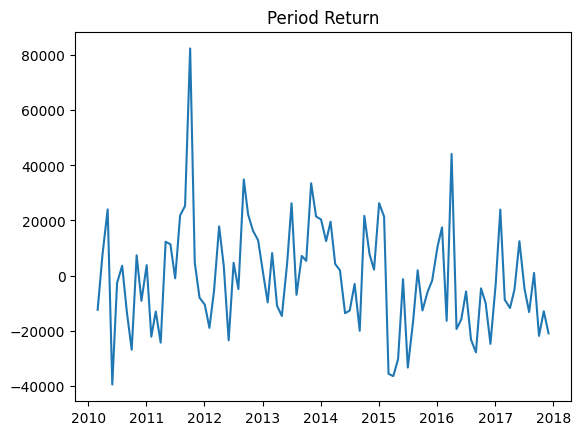

In [135]:
plot_res(df_res,"date","earning","Period Return")

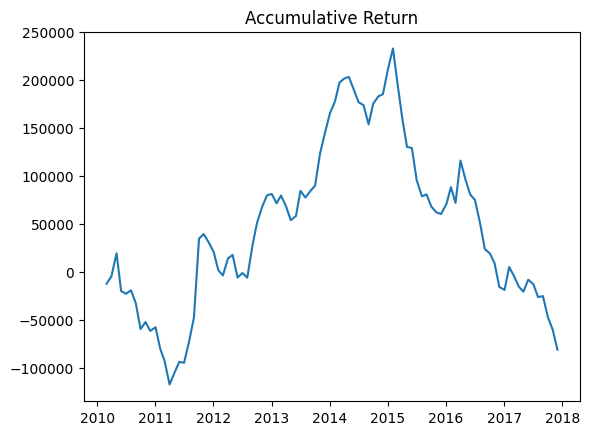

In [136]:
plot_res(df_res,"date","acc_earning","Accumulative Return")

In [39]:

# Portfolio turnover
def turn_over(strat_position, scale):
    '''
    Turnover Helper
    '''
    # print(strat_position)
    total_transact = np.sum(np.abs(strat_position.diff()))
    non_zeros = (strat_position != 0)
    sidx, eidx = non_zeros.idxmax(), non_zeros[::-1].idxmax()
    avg_transact = 0.5 * (np.abs(strat_position.loc[sidx]) + np.abs(strat_position.loc[eidx]))
    turnover = total_transact / avg_transact
    return turnover / strat_position.size * scale
    # return df_returns.diff().abs().sum()

